In [ ]:
%load_ext autoreload

In [ ]:
%autoreload 2
import subgrid_parameterization.preprocess.saminterface as sam

import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

In [ ]:
path0 = "/glade/work/stepheba/les_and_clubb_benchmark_runs/stepheba_sam_runs/derecho/"

path = "sam-lba/"
file = "LBA_128kmx128kmx128_1km_Morrison"

In [ ]:
ds = xr.open_dataset(path0 + path + file + ".nc")

In [ ]:
print(ds.coords)

Coordinates:
  * x        (x) float32 4B -61.95
  * y        (y) float32 4B -10.86
  * z        (z) float32 512B 25.0 50.0 105.3 ... 2.725e+04 2.75e+04 2.775e+04
  * time     (time) datetime64[ns] 3kB 1999-02-23T11:31:00 ... 1999-02-23T17:...


In [ ]:
z_sam = np.asarray(ds["z"], dtype=np.float64)
nzm = (len(z_sam) + 1) // 2
if np.isclose(2.0 * z_sam[0], z_sam[1]):
    zm = np.concatenate(([0], z_sam[2 : 2 * nzm - 1 : 2]))
    print("Combined staggered grids")
else:
    zm = np.concatenate(
        ([0], 0.5 * (z_sam[1 : 2 * nzm - 1 : 2] + z_sam[2 : 2 * nzm - 1 : 2]))
    )
grids = sam.CLUBBGrids.from_momentum_grid(zm)
sam_ds = sam.SAMDataInterface(ds, grids)

Combined staggered grids


In [ ]:
u2 = sam_ds.get_sam_variable_on_clubb_grid("U2", "zt")
v2 = sam_ds.get_sam_variable_on_clubb_grid("V2", "zt")
w2 = sam_ds.get_sam_variable_on_clubb_grid("W2", "zt")

TKE = 0.5 * (u2 + v2 + w2)

In [ ]:
istart = 300
ngrdcol = TKE.shape[0]
itime = range(istart, ngrdcol)
kstart = 0
kend = nzm  # -21 #int(0.75*nzm)
z = grids.zt[kstart:kend].T
e = TKE[itime, kstart:kend].T
up2 = u2[itime, kstart:kend].T
vp2 = v2[itime, kstart:kend].T
wp2 = w2[itime, kstart:kend].T

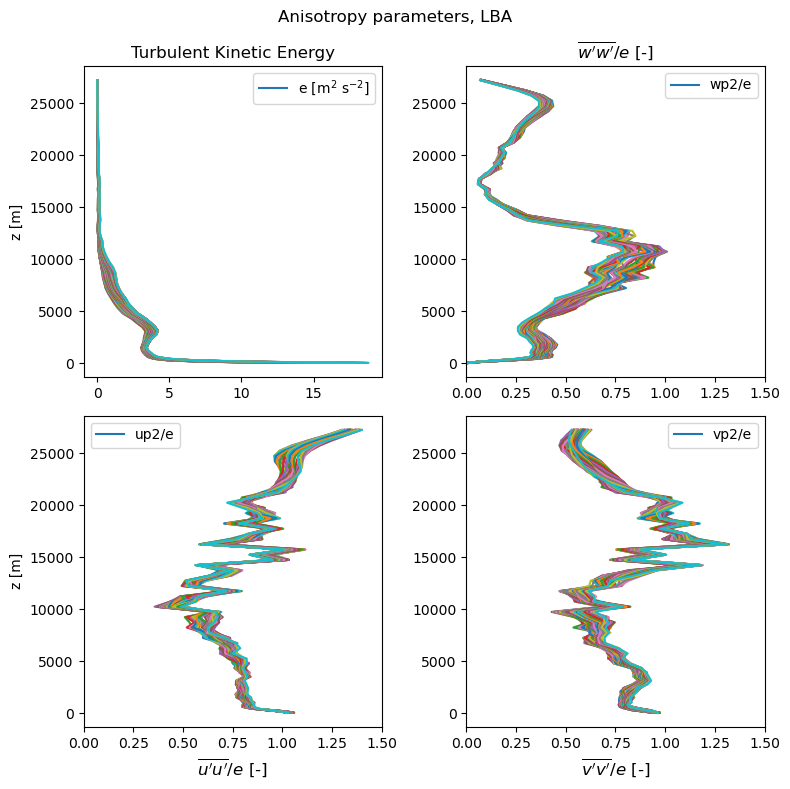

In [ ]:
fs = 12
try:
    del (fig, axs)
    print("deleted old figure")
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))
except:
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))

eplot = axs[0, 0].plot(e, z)
eplot[0].set_label(r"e [m$^2$ s$^{-2}$]")
axs[0, 0].set_title("Turbulent Kinetic Energy")

wplot = axs[0, 1].plot(wp2 / e, z)
wplot[0].set_label("wp2/e")
axs[0, 1].set_title(r"$\overline{w'w'}/e$ [-]")

uplot = axs[1, 0].plot(up2 / e, z)
uplot[0].set_label("up2/e")
axs[1, 0].set_xlabel(r"$\overline{u'u'}/e$ [-]", fontsize=fs)

vplot = axs[1, 1].plot(vp2 / e, z)
vplot[0].set_label("vp2/e")
axs[1, 1].set_xlabel(r"$\overline{v'v'}/e$ [-]", fontsize=fs)


for i in range(len(axs)):
    axs[i, 0].set_ylabel("z [m]")
    for j in range(len(axs[0])):
        axs[i, j].legend()
        if (i, j) != (0, 0):
            axs[i, j].set_xlim((0, 1.5))

fig.suptitle("Anisotropy parameters, LBA")
fig.tight_layout()

deleted old figure


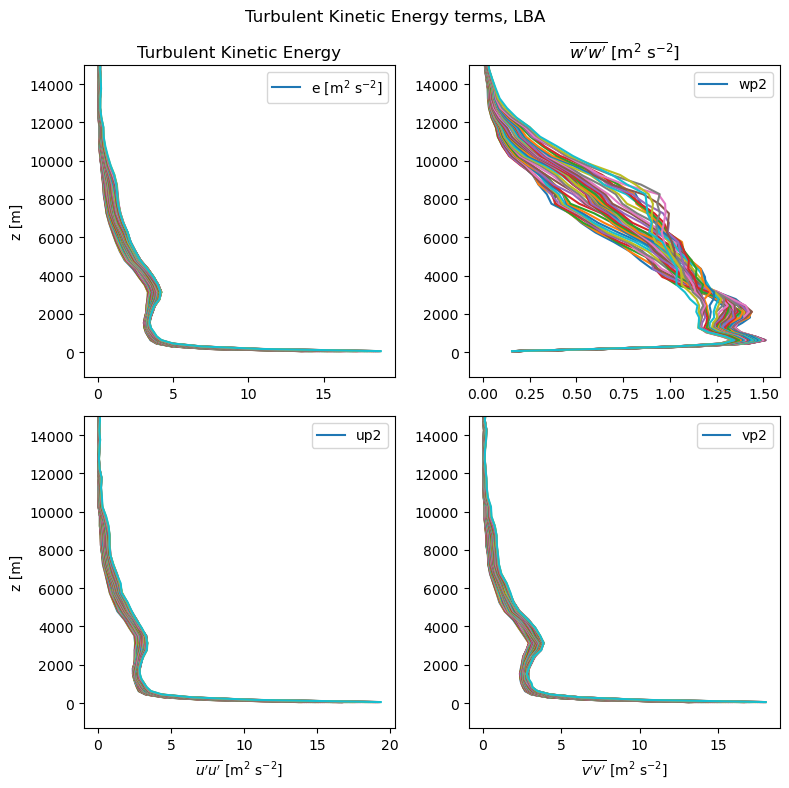

In [ ]:
try:
    del (fig, axs)
    print("deleted old figure")
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))
except:
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))

eplot = axs[0, 0].plot(e, z)
eplot[0].set_label(r"e [m$^2$ s$^{-2}$]")
axs[0, 0].set_title("Turbulent Kinetic Energy")

wplot = axs[0, 1].plot(wp2, z)
wplot[0].set_label("wp2")
axs[0, 1].set_title(r"$\overline{w'w'}$ [m$^2$ s$^{-2}$]")

uplot = axs[1, 0].plot(up2, z)
uplot[0].set_label("up2")
axs[1, 0].set_xlabel(r"$\overline{u'u'}$ [m$^2$ s$^{-2}$]")

vplot = axs[1, 1].plot(vp2, z)
vplot[0].set_label("vp2")
axs[1, 1].set_xlabel(r"$\overline{v'v'}$ [m$^2$ s$^{-2}$]")

for i in range(len(axs)):
    axs[i, 0].set_ylabel("z [m]")
    for j in range(len(axs[0])):
        axs[i, j].legend()
        # axs[i, j].set_xlim((0, 1.25))
        axs[i, j].set_ylim((None, 15000))

fig.suptitle("Turbulent Kinetic Energy terms, LBA")
fig.tight_layout()